In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Home Team MODEL

In [2]:
home_team = pd.read_csv('./datasets/created/home_db.csv')
home_team.head()

,home_score,away_goals_mean,away_goals_suf_mean,away_goals_suf_mean_l5,home_goals_mean
0,0,1.142857,1.285714,1.6,1.833333
1,0,1.571429,1.000000,1.0,1.714286
2,5,1.222222,1.111111,0.8,1.500000
3,1,0.333333,2.333333,2.4,1.250000
4,0,1.000000,1.714286,1.8,2.250000


In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("TRAINING RESULTS:")
    print(f"MEAN SQUARED ERROR:\n{mean_squared_error(y_train, y_train_pred):.4f}")
    print(f"MEAN ABSOLUTE ERROR:\n{mean_absolute_error(y_train, y_train_pred):.4f}")
    print(f"R2 SCORE:\n{r2_score(y_train, y_train_pred):.4f}")
    
    print("=============================== \nTESTING RESULTS:")
    print(f"MEAN SQUARED ERROR:\n{mean_squared_error(y_test, y_test_pred):.4f}")
    print(f"MEAN ABSOLUTE ERROR:\n{mean_absolute_error(y_test, y_test_pred):.4f}")
    print(f"R2 SCORE:\n{r2_score(y_test, y_test_pred):.4f}")


In [4]:
X = home_team.drop(["home_score"], axis=1)
y = home_team[["home_score"]]

In [5]:
X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_home = scaler.fit_transform(X_train_home)
X_test_home = scaler.transform(X_test_home)

In [7]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train_home,y_train_home)
    y_pred = model.predict(X_test_home)
    print(classification_report(y_test_home,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test_home,y_pred);

## random forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
model_rf_home = RandomForestRegressor()
model_rf_home.fit(X_train_home,y_train_home)

evaluate(model_rf_home, X_train_home, X_test_home, y_train_home, y_test_home)

/home/yoni/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


TRAINING RESULTS:
MEAN SQUARED ERROR:
0.2579
MEAN ABSOLUTE ERROR:
0.4099
R2 SCORE:
0.8608
TESTING RESULTS:
MEAN SQUARED ERROR:
1.4797
MEAN ABSOLUTE ERROR:
1.0591
R2 SCORE:
-0.2612


## ada boost

In [9]:
from sklearn.ensemble import AdaBoostRegressor
model_ab_home = AdaBoostRegressor()
model_ab_home.fit(X_train_home,y_train_home)

evaluate(model_ab_home, X_train_home, X_test_home, y_train_home, y_test_home)

TRAINING RESULTS:
MEAN SQUARED ERROR:
1.2837
MEAN ABSOLUTE ERROR:
0.9633
R2 SCORE:
0.3072
TESTING RESULTS:
MEAN SQUARED ERROR:
1.4375
MEAN ABSOLUTE ERROR:
1.0423
R2 SCORE:
-0.2252


/home/yoni/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## xgboost

In [35]:
from xgboost import XGBRegressor
model_xgb_home = XGBRegressor()
model_xgb_home.fit(X_train_home,y_train_home)

evaluate(model_xgb_home, X_train_home, X_test_home, y_train_home, y_test_home)

TRAINING RESULTS:
MEAN SQUARED ERROR:
0.0001
MEAN ABSOLUTE ERROR:
0.0051
R2 SCORE:
1.0000
TESTING RESULTS:
MEAN SQUARED ERROR:
2.0150
MEAN ABSOLUTE ERROR:
1.1276
R2 SCORE:
-0.7174


## gradient boosting

In [34]:
gb_home = GradientBoostingRegressor()
gb_home.fit(X_train_home, y_train_home)

evaluate(gb_home, X_train_home, X_test_home, y_train_home, y_test_home)

/home/yoni/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TRAINING RESULTS:
MEAN SQUARED ERROR:
0.3755
MEAN ABSOLUTE ERROR:
0.4911
R2 SCORE:
0.7974
TESTING RESULTS:
MEAN SQUARED ERROR:
1.7151
MEAN ABSOLUTE ERROR:
1.1019
R2 SCORE:
-0.4618


## Ada boost tuning

In [36]:
from sklearn.ensemble import AdaBoostRegressor

ab_home = AdaBoostRegressor()
# Make a dictionary of hyperparameter values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Grid search with the AdaBoost regressor
grid_search_ab_home = GridSearchCV(ab_home, param_grid, cv=5, n_jobs=-1)
grid_search_ab_home.fit(X_train_home, y_train_home)

# Print the best parameters
print(grid_search_ab_home.best_params_)

# Evaluate the model
evaluate(grid_search_ab_home, X_train_home, X_test_home, y_train_home, y_test_home)


/home/yoni/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yoni/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yoni/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yoni/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 200}
TRAINING RESULTS:
MEAN SQUARED ERROR:
1.2285
MEAN ABSOLUTE ERROR:
0.9412
R2 SCORE:
0.3370
TESTING RESULTS:
MEAN SQUARED ERROR:
1.3975
MEAN ABSOLUTE ERROR:
1.0125
R2 SCORE:
-0.1911


In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Regresión Lineal Simple
lin_reg = LinearRegression()
lin_reg.fit(X_train_home, y_train_home)
y_pred = lin_reg.predict(X_test_home)
print('MSE Linear Regression:', mean_squared_error(y_test_home, y_pred))
print('R2 Linear Regression:', r2_score(y_test_home, y_pred))

# Regresión Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_home, y_train_home)
y_pred = ridge_reg.predict(X_test_home)
print('MSE Ridge Regression:', mean_squared_error(y_test_home, y_pred))
print('R2 Ridge Regression:', r2_score(y_test_home, y_pred))

# Regresión Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_home, y_train_home)
y_pred = lasso_reg.predict(X_test_home)
print('MSE Lasso Regression:', mean_squared_error(y_test_home, y_pred))
print('R2 Lasso Regression:', r2_score(y_test_home, y_pred))


MSE Linear Regression: 1.2823553393482265
R2 Linear Regression: -0.0929623550740788
MSE Ridge Regression: 1.280951742967299
R2 Ridge Regression: -0.09176605794878134
MSE Lasso Regression: 1.2120681396502175
R2 Lasso Regression: -0.03305597736714505


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Árbol de Decisión
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_home, y_train_home)
y_pred = tree_reg.predict(X_test_home)
print('MSE Decision Tree:', mean_squared_error(y_test_home, y_pred))
print('R2 Decision Tree:', r2_score(y_test_home, y_pred))

# Random Forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train_home, y_train_home)
y_pred = forest_reg.predict(X_test_home)
print('MSE Random Forest:', mean_squared_error(y_test_home, y_pred))
print('R2 Random Forest:', r2_score(y_test_home, y_pred))


MSE Decision Tree: 3.5964912280701755
R2 Decision Tree: -2.065320041972718


/home/yoni/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE Random Forest: 1.523554385964912
R2 Random Forest: -0.29853835257082895


In [39]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_reg.fit(X_train_home, y_train_home)
y_pred = svr_reg.predict(X_test_home)
print('MSE SVR:', mean_squared_error(y_test_home, y_pred))
print('R2 SVR:', r2_score(y_test_home, y_pred))


/home/yoni/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE SVR: 1.2679612619312548
R2 SVR: -0.08069416054948775


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}

In [7]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


In [8]:
grid_search_regression = GridSearchCV(pipeline, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search_regression.fit(X_train.values, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [9]:
test_mse = mean_squared_error(y_test, grid_search_regression.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search_regression.best_params_)
print("Best MSE:", grid_search_regression.best_score_)

Test Mean Squared Error: 1.5071493290456448
Best Parameters: {'regressor__fit_intercept': True}
Best MSE: -1.6165199368499277


In [10]:
def residuals_plot(y_pred, y_test):
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    #plt.plot([min(y_test), min(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')
    plt.show()

In [11]:
y_values = [a[0] for a in y_test.values]


In [12]:
y_pred = [a[0] for a in grid_search_regression.predict(X_test.values)]#.mean()


In [13]:
lr_home = grid_search_regression.best_estimator_

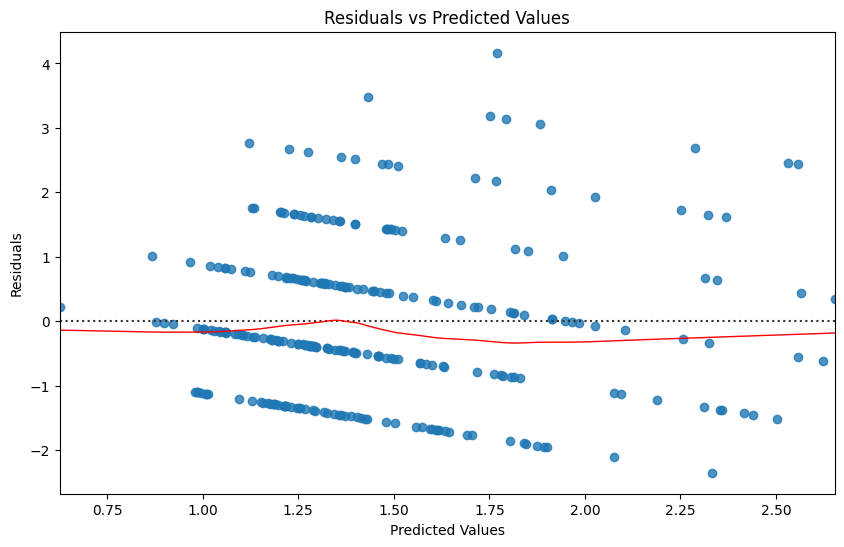

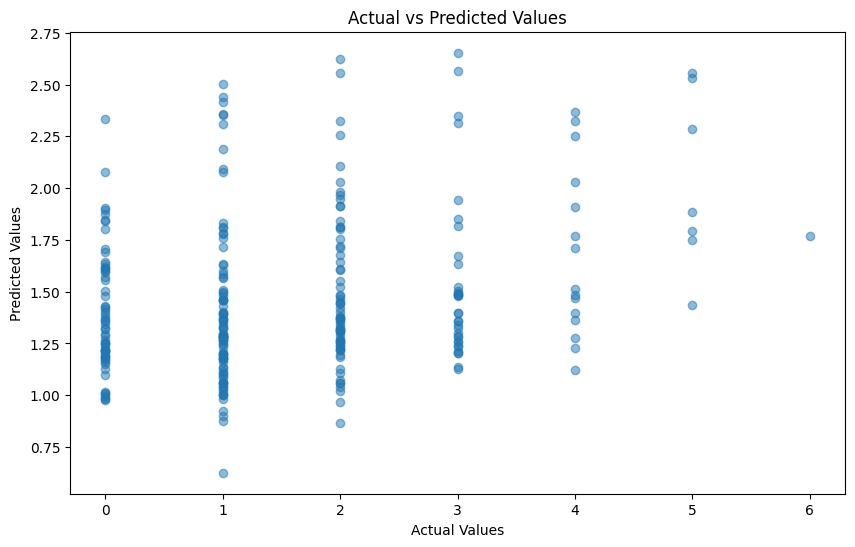

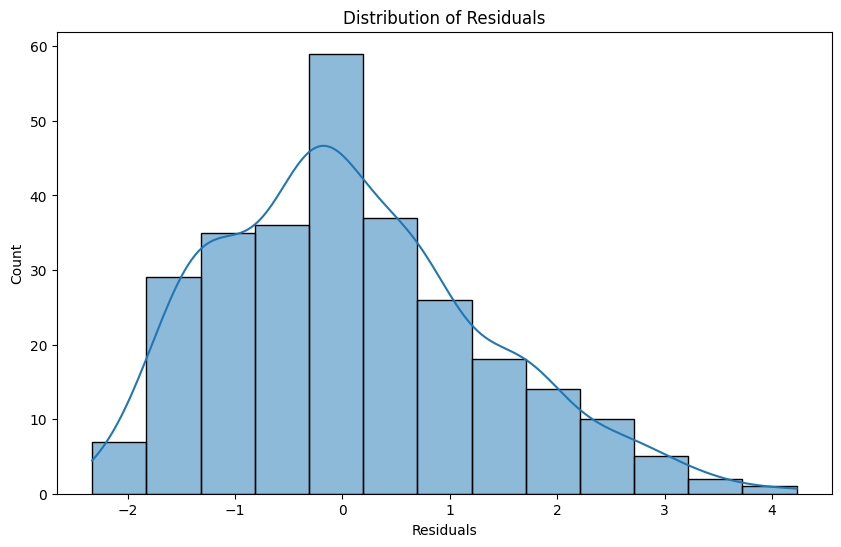

In [14]:
residuals_plot(np.array(y_pred), np.array(y_values))


In [15]:
rf_regressor = RandomForestRegressor()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'max_features': ['log2']  # Number of features to consider when looking for the best split
}

In [16]:
# Perform grid search with cross-validation using Mean Squared Error as the scoring function
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, np.ravel(y_train))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30], 'max_features': ['log2'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [17]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 1.5445770512496506
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 300}
Best MSE Score: -1.707397047458563


In [18]:
y_pred = grid_search.predict(X_test.values)


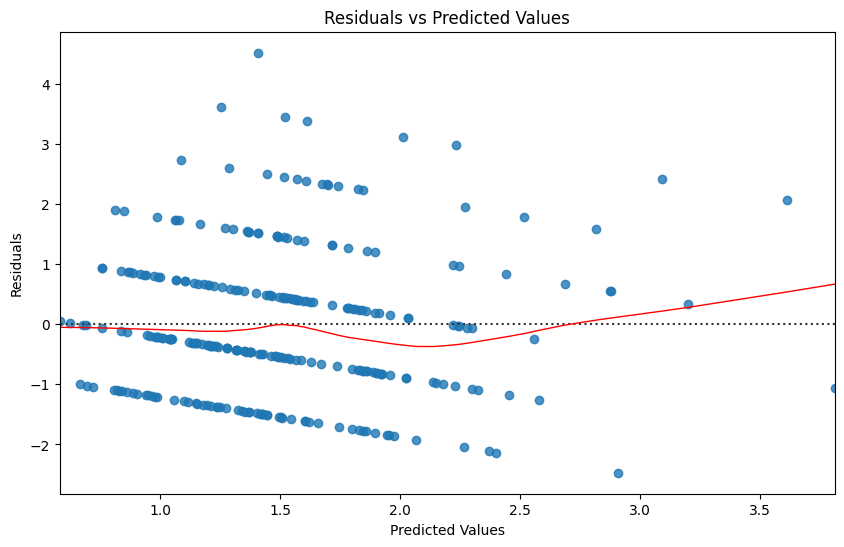

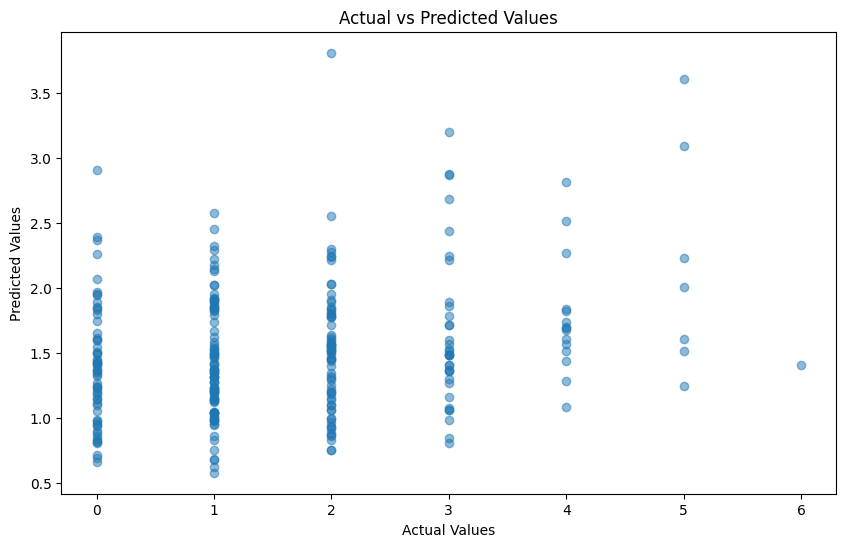

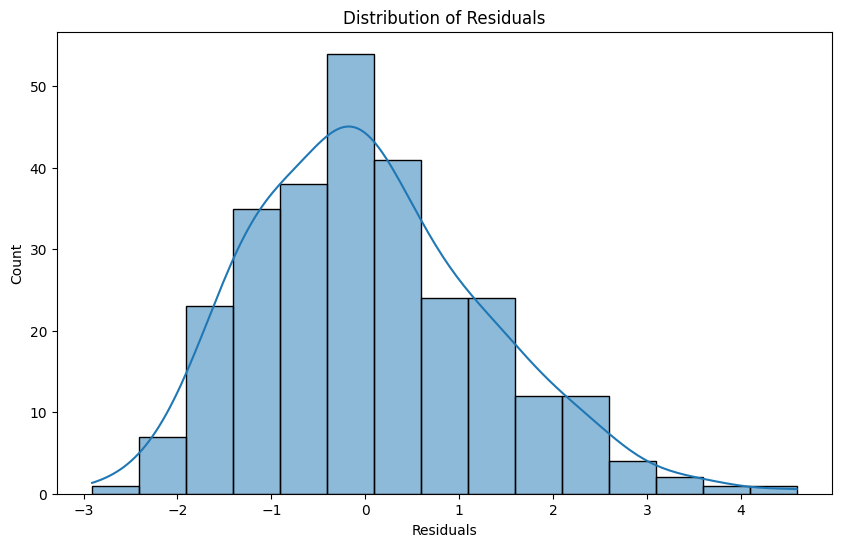

In [19]:
residuals_plot(np.array(y_pred), np.array(y_values))


In [20]:
rf_home = grid_search.best_estimator_


In [21]:
model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [22]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=mse_scorer, cv=5)
grid_search.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [23]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 1.4672109134898699
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best MSE Score: -1.6499238086980799


/home/yoni/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [24]:
y_pred = grid_search.predict(X_test.values)


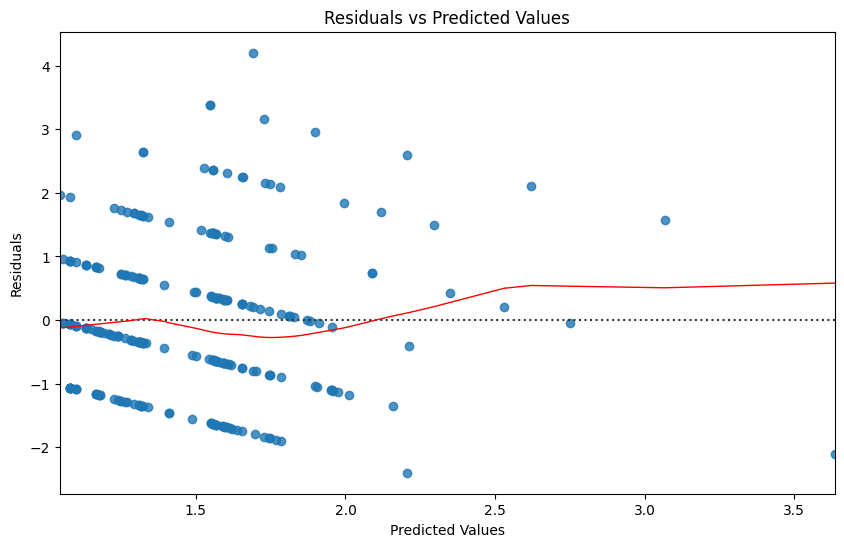

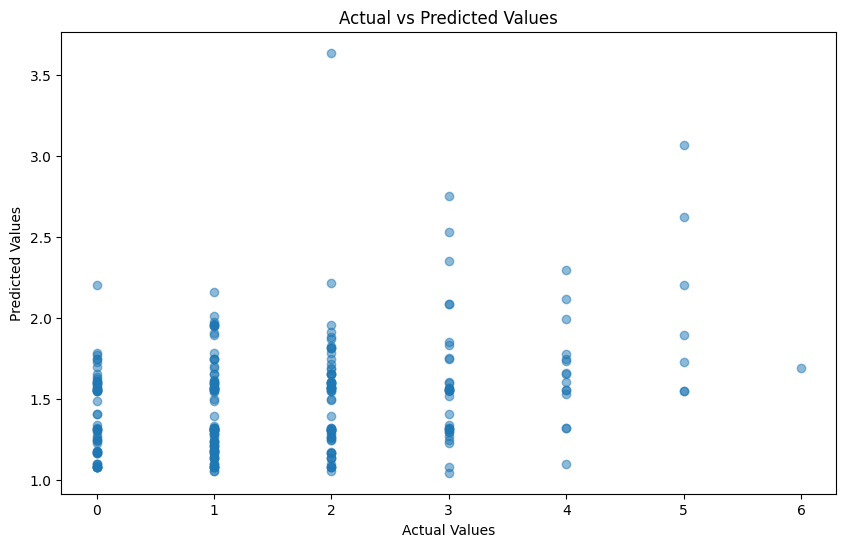

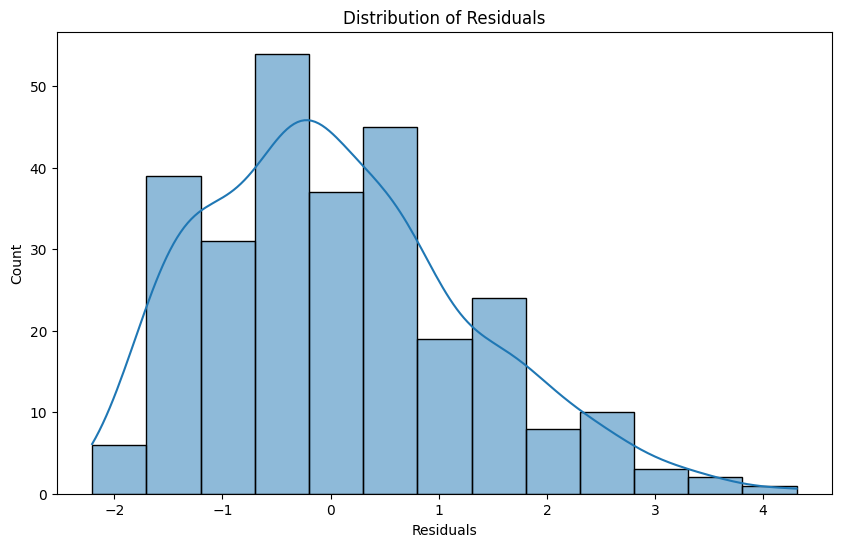

In [25]:
residuals_plot(y_pred, y_values)


In [26]:
gb_home = grid_search.best_estimator_

In [115]:
import pickle
import os

models_folder = "./models"

os.makedirs(models_folder, exist_ok=True)


with open('models/gb_home.pkl', 'wb') as f:
    pickle.dump(gb_home , f)

# Away Team MODEL

In [88]:
df = pd.read_csv("./datasets/created/away_db.csv")

In [89]:
X = df.drop(["away_score"], axis=1)
y = df[["away_score"]]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [92]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}

In [93]:
grid_search_regression_away = GridSearchCV(pipeline, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search_regression_away.fit(X_train.values, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [94]:
test_mse = mean_squared_error(y_test, grid_search_regression_away.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search_regression_away.best_params_)
print("Best MSE:", grid_search_regression_away.best_score_)
print("R2 Score:", r2_score(y_test, grid_search.predict(X_test.values)))

Test Mean Squared Error: 1.3280189284111807
Best Parameters: {'regressor__fit_intercept': True}
Best MSE: -1.001052213819771
R2 Score: 0.028469608581536465


/home/yoni/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [95]:
y_values = [a[0] for a in y_test.values]
y_pred = [a[0] for a in grid_search_regression_away.predict(X_test.values)]#.mean()
lr_away = grid_search_regression_away.best_estimator_

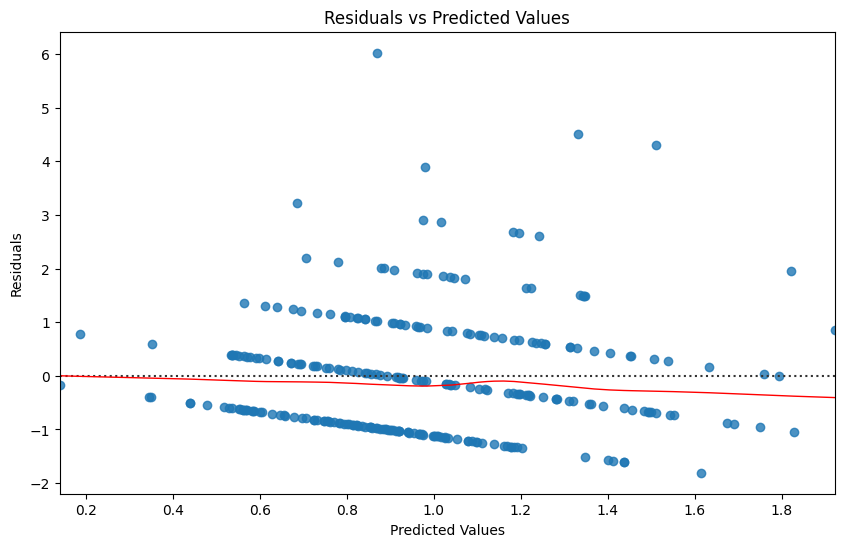

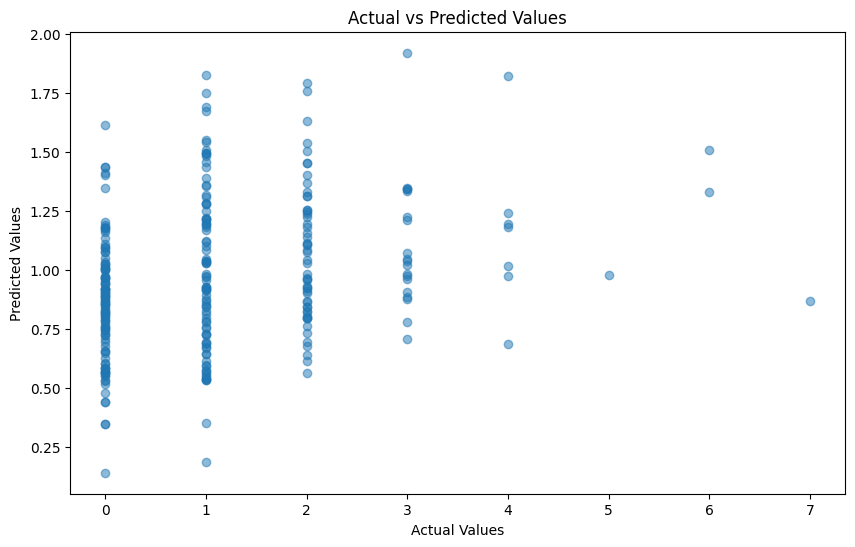

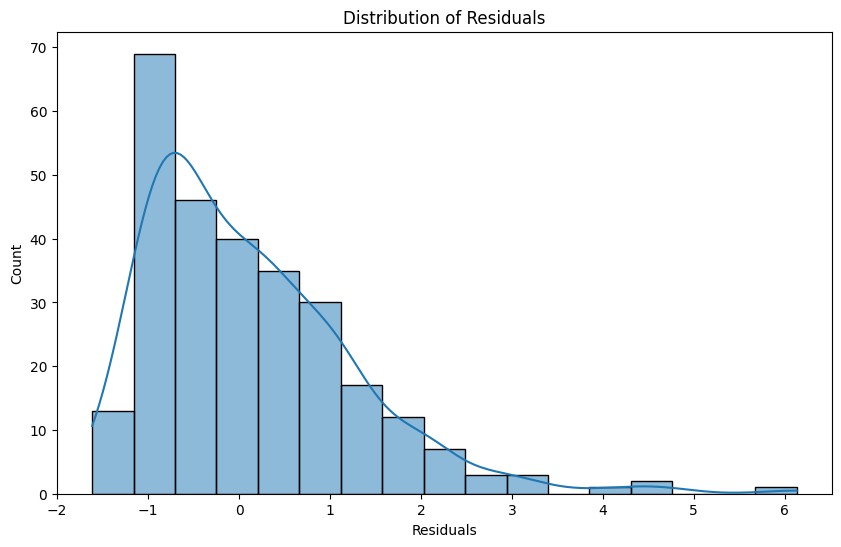

In [96]:
residuals_plot(np.array(y_pred), np.array(y_values))


In [97]:
rf_regressor = RandomForestRegressor()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [200, 300],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'max_features': ['log2']  # Number of features to consider when looking for the best split
}

In [98]:
# Perform grid search with cross-validation using Mean Squared Error as the scoring function
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, np.ravel(y_train))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'max_features': ['log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [99]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)
print("R2 Score:", r2_score(y_test, grid_search.predict(X_test.values)))

Test Mean Squared Error: 1.395897130913427
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}
Best MSE Score: -1.0227500850593674
R2 Score: 0.025331187389604826


In [100]:
y_pred = grid_search.predict(X_test.values)


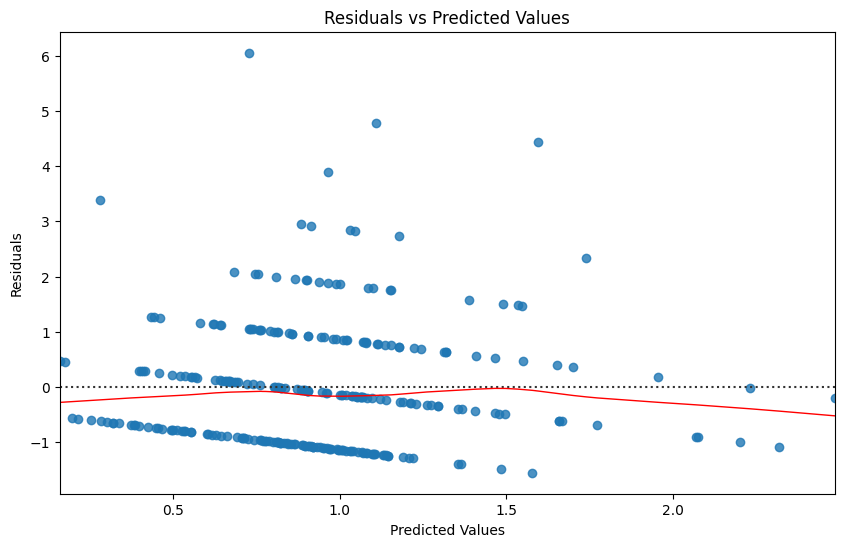

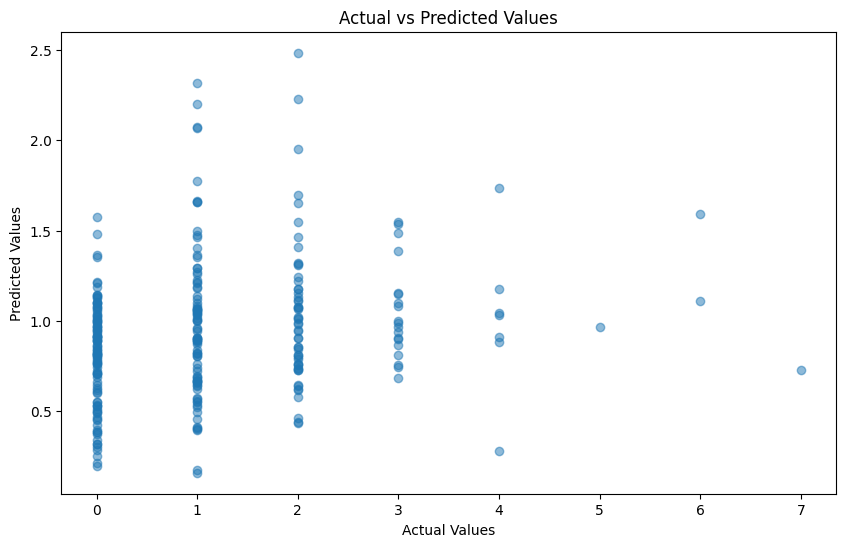

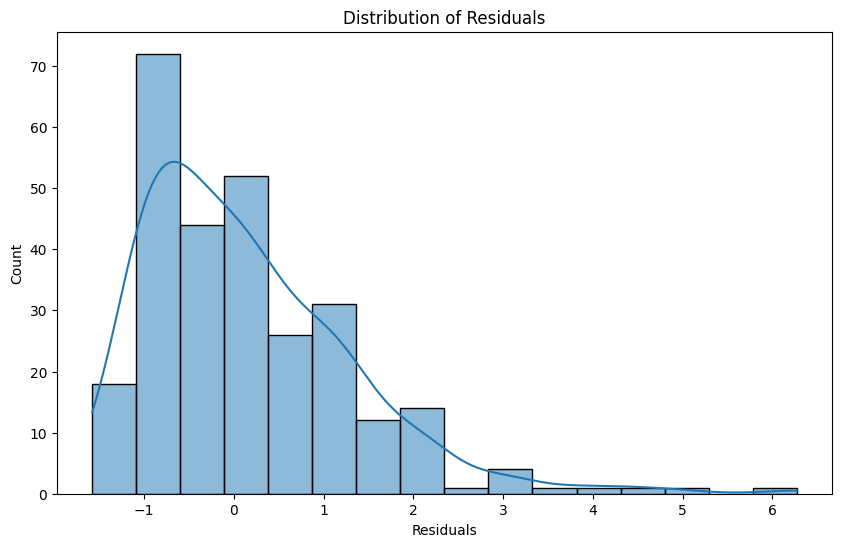

In [101]:
residuals_plot(y_pred, y_values)


In [102]:
rf_away = grid_search.best_estimator_
model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [103]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=mse_scorer, cv=5)
grid_search.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [104]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)
print("R2 Score:", r2_score(y_test, grid_search.predict(X_test.values)))

Test Mean Squared Error: 1.3756784501948072
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Best MSE Score: -1.0139649579686318
R2 Score: 0.03944864425096439


In [105]:
y_pred = grid_search.predict(X_test.values)

In [106]:
gb_away = grid_search.best_estimator_

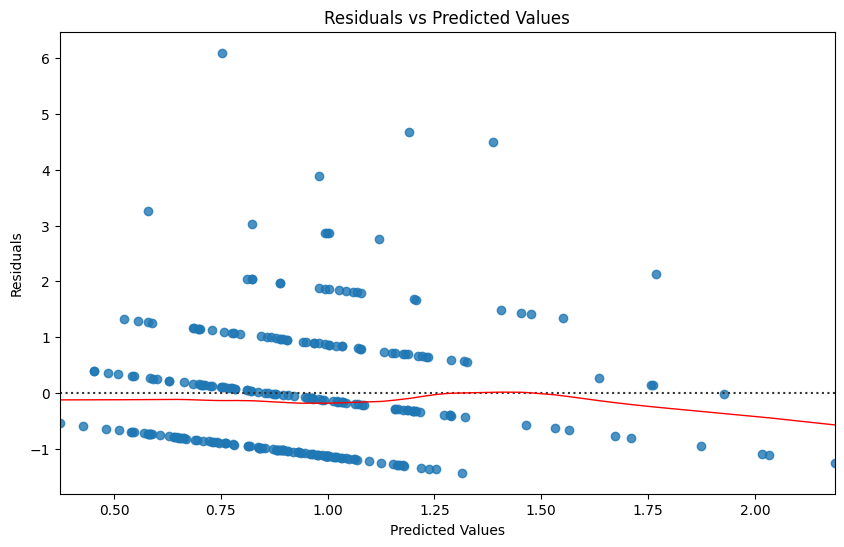

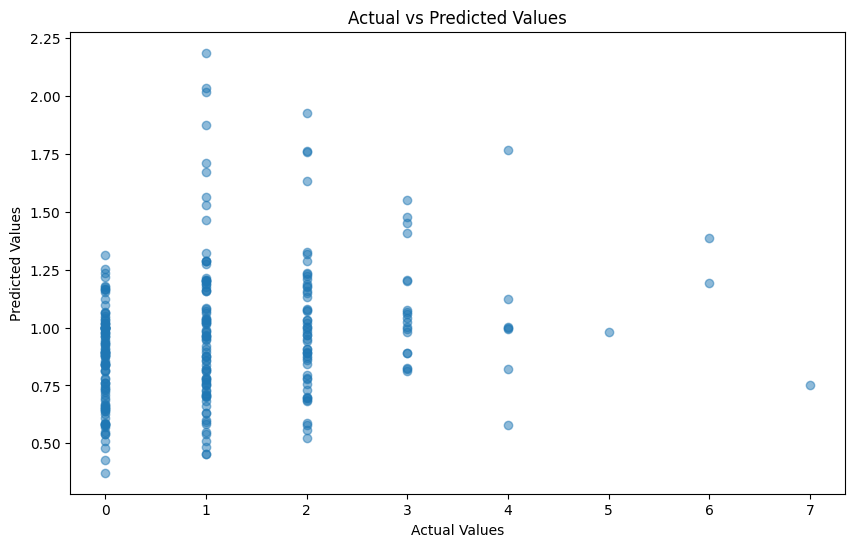

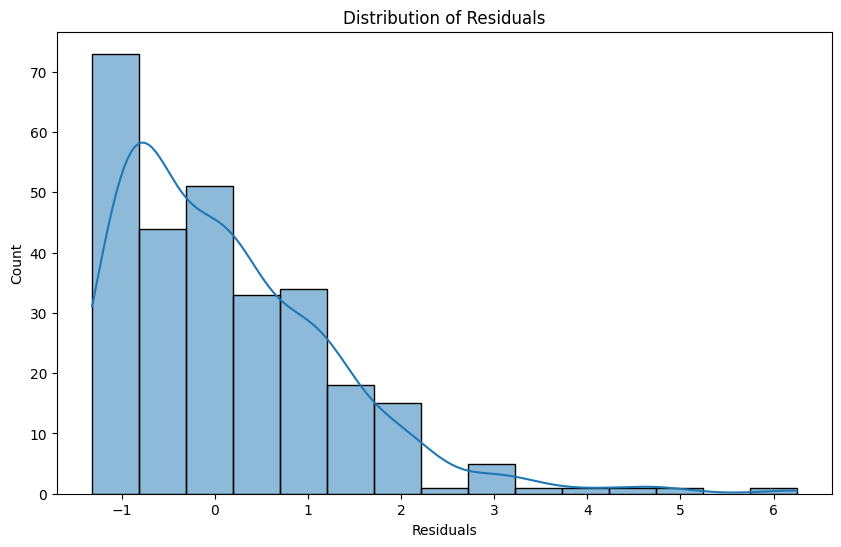

In [107]:
residuals_plot(y_pred, y_values)


In [108]:
import pickle
import os

models_folder = "./models"

os.makedirs(models_folder, exist_ok=True)


with open('models/gb_away.pkl', 'wb') as f:
    pickle.dump(gb_away, f)

# REDES

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop


In [111]:
home_team = pd.read_csv('./datasets/created/home_db.csv')

# Dividir datos en conjunto de entrenamiento y prueba
X_home = home_team.drop(["home_score"], axis=1)
y_home = home_team["home_score"]

X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(X_home, y_home, test_size=0.3, random_state=42)

# Escalar los datos
scaler_home = StandardScaler()
X_train_home_scaled = scaler_home.fit_transform(X_train_home)
X_test_home_scaled = scaler_home.transform(X_test_home)

In [112]:
model_home = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_home.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(1)
])

model_home.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history_home = model_home.fit(X_train_home_scaled, y_train_home, 
                              validation_data=(X_test_home_scaled, y_test_home),
                              epochs=200, batch_size=8, callbacks=[early_stopping], verbose=1)

# Evaluar el modelo en el conjunto de prueba
test_loss_home = model_home.evaluate(X_test_home_scaled, y_test_home, verbose=0)
print(f"Test Mean Squared Error (HOME): {test_loss_home}")
print("R2 Score:", r2_score(y_test_home, model_home.predict(X_test_home_scaled)))

/home/yoni/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.5852 - val_loss: 3.1379
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5520 - val_loss: 2.3422
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4282 - val_loss: 1.8969
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8118 - val_loss: 1.7161
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3755 - val_loss: 1.7691
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4561 - val_loss: 1.7562
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2297 - val_loss: 1.6990
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0443 - val_loss: 1.7035
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0861 - val_loss: 1.6945
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7368 - val_loss: 1.7391
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9875 - val_loss: 1.6931
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━━━

In [110]:
away_team = pd.read_csv('./datasets/created/away_db.csv')

X_away = away_team.drop(["away_score"], axis=1)
y_away = away_team["away_score"]

X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(X_away, y_away, test_size=0.3, random_state=42)

scaler_away = StandardScaler()
X_train_away_scaled = scaler_away.fit_transform(X_train_away)
X_test_away_scaled = scaler_away.transform(X_test_away)


# Definir el modelo más complejo
model_away = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_away.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(1)
])

# Compilar el modelo
model_away.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

# Configurar early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history_away = model_away.fit(X_train_away_scaled, y_train_away, 
                              validation_data=(X_test_away_scaled, y_test_away),
                              epochs=200, batch_size=8, callbacks=[early_stopping], verbose=1)

# Evaluar el modelo en el conjunto de prueba
test_loss_away = model_away.evaluate(X_test_away_scaled, y_test_away, verbose=0)
print(f"Test Mean Squared Error (AWAY): {test_loss_away}")
print("R2 Score:", r2_score(y_test_away, model_away.predict(X_test_away_scaled)))

/home/yoni/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 3.6264 - val_loss: 1.7391
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3854 - val_loss: 1.5788
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7308 - val_loss: 1.5010
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4466 - val_loss: 1.4656
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3420 - val_loss: 1.4692
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2642 - val_loss: 1.4562
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1843 - val_loss: 1.4482
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2185 - val_loss: 1.4623
Epoch 9/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2378 - val_loss: 1.4471
Epoch 10/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2051 - val_loss: 1.4451
Epoch 11/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0866 - val_loss: 1.4416
Epoch 12/200
122/122 ━━━━━━━━━━━━━━━━━━━

In [113]:
# Guardar modelo para HOME Team
model_home.save('./models/model_home_nn.h5')

# Guardar modelo para AWAY Team
model_away.save('./models/model_away_nn.h5')

In [114]:
import pickle

with open('models/scaler_away.pkl', 'wb') as f:
    pickle.dump(scaler_away, f)

# BOOSTING más pro

In [59]:
from sklearn.metrics import accuracy_score


In [83]:
away_team = pd.read_csv('./datasets/created/away_db.csv')

X_away = away_team.drop(["away_score"], axis=1)
y_away = away_team["away_score"]


X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(X_away, y_away, test_size=0.3, random_state=42)


In [79]:
#print the dimensions of the training and testing datasets
print(X_train_away.shape)
print(X_test_away.shape)
print(y_train_away.shape)
print(y_test_away.shape)

(975, 4)
(418, 4)
(975,)
(418,)


In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("TRAINING RESULTS:")
    print(f"MEAN SQUARED ERROR:\n{mean_squared_error(y_train, y_train_pred):.4f}")
    print(f"MEAN ABSOLUTE ERROR:\n{mean_absolute_error(y_train, y_train_pred):.4f}")
    print(f"R2 SCORE:\n{r2_score(y_train, y_train_pred):.4f}")
    
    print("=============================== \nTESTING RESULTS:")
    print(f"MEAN SQUARED ERROR:\n{mean_squared_error(y_test, y_test_pred):.4f}")
    print(f"MEAN ABSOLUTE ERROR:\n{mean_absolute_error(y_test, y_test_pred):.4f}")
    print(f"R2 SCORE:\n{r2_score(y_test, y_test_pred):.4f}")


In [85]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter sets to test
param_grid = {
    "max_depth": [5, 10, 15],
    "learning_rate": [0.001, 0.1, 0.3, 0.5],
    "n_estimators": [100, 250, 500],
    "max_features": ['sqrt', 'log2']
}

# Define the model to use
model = GradientBoostingRegressor(random_state=8)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train_away, y_train_away)

# Save the results to a DataFrame and then to a CSV file
CV_results_dt = pd.DataFrame(CV_model.cv_results_)
CV_results_dt.to_csv('cv_results_dt.csv', index=False)

# Print the best parameters
best_params = CV_model.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


Best Parameters: {'learning_rate': 0.001, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}


In [86]:

#Función que crea el modelo
def run_model(X_train_away, X_test_away, y_train_away, y_test_away):
    boostingBaseGridSearchCV = GradientBoostingRegressor(max_depth=10, learning_rate=0.01, max_features="sqrt", n_estimators=500, random_state = 3)
    boostingBaseGridSearchCV.fit(X_train_away, y_train_away)
    return boostingBaseGridSearchCV
 
#ejecutamos el modelo 
boostingBaseGridSearchCV = run_model(X_train_away, X_test_away, y_train_away, y_test_away)

evaluate(boostingBaseGridSearchCV, X_train_away, X_test_away, y_train_away, y_test_away)

TRAINING RESULTS:
MEAN SQUARED ERROR:
0.0426
MEAN ABSOLUTE ERROR:
0.1609
R2 SCORE:
0.9588
TESTING RESULTS:
MEAN SQUARED ERROR:
1.4842
MEAN ABSOLUTE ERROR:
0.9365
R2 SCORE:
-0.0422


In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar los datos
# Asegúrate de ajustar la ruta o forma de cargar los datos según tu caso
data = pd.read_csv('./datasets/created/away_db.csv')


# Separar las características y el target
X = data.drop('away_score', axis=1)
y = data['away_score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar el modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluar el modelo con los mejores parámetros
best_rf_model = grid_search.best_estimator_
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

print("TRAINING RESULTS:")
print(f"MEAN SQUARED ERROR:\n{mean_squared_error(y_train, y_train_pred):.4f}")
print(f"MEAN ABSOLUTE ERROR:\n{mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"R2 SCORE:\n{r2_score(y_train, y_train_pred):.4f}")

print("=============================== \nTESTING RESULTS:")
print(f"MEAN SQUARED ERROR:\n{mean_squared_error(y_test, y_test_pred):.4f}")
print(f"MEAN ABSOLUTE ERROR:\n{mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"R2 SCORE:\n{r2_score(y_test, y_test_pred):.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/home/yoni/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/home/yoni/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/yoni/.local/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/yoni/.local/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/yoni/.local/lib/p

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
TRAINING RESULTS:
MEAN SQUARED ERROR:
0.6076
MEAN ABSOLUTE ERROR:
0.6125
R2 SCORE:
0.4381
TESTING RESULTS:
MEAN SQUARED ERROR:
1.3914
MEAN ABSOLUTE ERROR:
0.8726
R2 SCORE:
0.0285
